In [11]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import numpy as np
from sklearn.neighbors import NearestNeighbors
from catboost import CatBoostRegressor
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
#itog_table = pd.read_csv('ekb.csv')
all_filenames=['ekb.csv', "tula.csv", "cochi.csv",]
itog_table = pd.concat([pd.read_csv(f) for f in all_filenames], ignore_index=True)
itog_table

,geometry,polylines,id,city,object,type,lat,lon
0,POLYGON ((60.64741652894499 56.935418894995266...,"[(56.935418894995266, 60.64741652894499), (56....",7,Екатеринбург,highway,footway,56.938672,60.633513
1,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,amenity,kindergarten,56.880502,60.508977
2,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,highway,footway,56.881127,60.512591
3,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,highway,footway,56.881971,60.507913
4,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,highway,footway,56.882417,60.509578
...,...,...,...,...,...,...,...,...
35221,"POLYGON ((39.44489702522682 43.80438057806914,...","[(43.80438057806914, 39.44489702522682), (43.8...",4758,Сочи,highway,footway,43.801924,39.455894
35222,"POLYGON ((39.44489702522682 43.80438057806914,...","[(43.80438057806914, 39.44489702522682), (43.8...",4758,Сочи,highway,footway,43.801940,39.456019
35223,"POLYGON ((39.44489702522682 43.80438057806914,...","[(43.80438057806914, 39.44489702522682), (43.8...",4758,Сочи,highway,footway,43.801951,39.456101
35224,"POLYGON ((39.44489702522682 43.80438057806914,...","[(43.80438057806914, 39.44489702522682), (43.8...",4758,Сочи,highway,footway,43.802401,39.455912


In [181]:
itog_table['positive']=np.where(itog_table['type'].isin(good_point), 1, 0)
itog_table['negative']=np.where(itog_table['type'].isin(bad_point), 1, 0)
itog_table['schools']=np.where(itog_table['type'].isin(schools), 1, 0)
itog_table['park']=np.where(itog_table['type']=='park', 1, 0)
itog_table

,geometry,polylines,id,city,object,type,lat,lon,positive,negative,scools,park
0,POLYGON ((60.64741652894499 56.935418894995266...,"[(56.935418894995266, 60.64741652894499), (56....",7,Екатеринбург,highway,footway,56.938672,60.633513,1,0,0,0
1,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,amenity,kindergarten,56.880502,60.508977,0,0,1,0
2,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,highway,footway,56.881127,60.512591,1,0,0,0
3,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,highway,footway,56.881971,60.507913,1,0,0,0
4,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,highway,footway,56.882417,60.509578,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35221,"POLYGON ((39.44489702522682 43.80438057806914,...","[(43.80438057806914, 39.44489702522682), (43.8...",4758,Сочи,highway,footway,43.801924,39.455894,1,0,0,0
35222,"POLYGON ((39.44489702522682 43.80438057806914,...","[(43.80438057806914, 39.44489702522682), (43.8...",4758,Сочи,highway,footway,43.801940,39.456019,1,0,0,0
35223,"POLYGON ((39.44489702522682 43.80438057806914,...","[(43.80438057806914, 39.44489702522682), (43.8...",4758,Сочи,highway,footway,43.801951,39.456101,1,0,0,0
35224,"POLYGON ((39.44489702522682 43.80438057806914,...","[(43.80438057806914, 39.44489702522682), (43.8...",4758,Сочи,highway,footway,43.802401,39.455912,1,0,0,0


In [182]:
# Функция для нахождения расстояния до ближайших точек
def n_neighbors(X_train, return_distance=True):
    #X_train -объекты до которых ищем ближайщие расстояния (бары)
    #X_zone - объекты для которых ищесм расстояния (школы)
    X_train = np.radians(X_train.values)
    #111 км в 1 градусе
    neigh = NearestNeighbors(n_neighbors=10, metric='haversine')
    neigh.fit(X_train)
    distances, indexes = neigh.kneighbors(X_zone, n_neighbors=1, return_distance=True)
    
    return np.array([round(x[0]*6371, 3) for x in distances]), np.array([x[0] for x in indexes]) #*6371 километры

In [183]:
# школы
X_zone = itog_table[['lat','lon']].values
X_zone = np.radians(X_zone)

In [184]:
#расстояние от плохих объктов до школ (100 м)
distances, indexes = n_neighbors(itog_table[itog_table['type'].isin(schools)][["lat", "lon"]])
#itog_table['bad_dist']=distances
itog_table['bad_dist']=np.where(itog_table['negative']==1, distances, -1)

In [185]:
itog_table[itog_table['negative']==1]

,geometry,polylines,id,city,object,type,lat,lon,positive,negative,scools,park,bad_dist
33,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,amenity,fast_food,56.885396,60.509629,0,1,0,0,0.154
35,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,shop,alcohol,56.885467,60.505809,0,1,0,0,0.148
46,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,shop,alcohol,56.880496,60.516743,0,1,0,0,0.411
49,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,shop,alcohol,56.881028,60.516615,0,1,0,0,0.362
53,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,shop,alcohol,56.883091,60.520308,0,1,0,0,0.096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35069,POLYGON ((39.57872234958869 43.716792222232876...,"[(43.716792222232876, 39.57872234958869), (43....",4562,Сочи,shop,alcohol,43.715713,39.568532,0,1,0,0,2.417
35070,POLYGON ((39.57872234958869 43.716792222232876...,"[(43.716792222232876, 39.57872234958869), (43....",4562,Сочи,amenity,bar,43.715829,39.569165,0,1,0,0,2.432
35085,"POLYGON ((39.57887737918688 43.7085172006864, ...","[(43.7085172006864, 39.57887737918688), (43.70...",4677,Сочи,amenity,fast_food,43.704757,39.586567,0,1,0,0,1.375
35171,"POLYGON ((39.76889188961187 43.58137802866156,...","[(43.58137802866156, 39.76889188961187), (43.5...",4715,Сочи,amenity,biergarten,43.581359,39.765282,0,1,0,0,1.005


In [186]:
#расстояние от парков (200 м)
distances, indexes = n_neighbors(itog_table[itog_table['type'].isin(['park'])][["lat", "lon"]])
#itog_table['bad_dist']=distances
itog_table['park_dist']=np.where(itog_table['negative']==1, distances, -1)

In [187]:
itog_table['bad_schools']=np.where(itog_table['bad_dist']<=0.1, 1, 0)
itog_table['bad_park']=np.where(itog_table['park_dist']<=0.2, 1, 0)

In [188]:
temp = itog_table[itog_table['negative']==1]
temp

,geometry,polylines,id,city,object,type,lat,lon,positive,negative,scools,park,bad_dist,park_dist,bad_scools,bad_park
33,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,amenity,fast_food,56.885396,60.509629,0,1,0,0,0.154,0.493,0,0
35,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,shop,alcohol,56.885467,60.505809,0,1,0,0,0.148,0.641,0,0
46,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,shop,alcohol,56.880496,60.516743,0,1,0,0,0.411,0.214,0,0
49,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,shop,alcohol,56.881028,60.516615,0,1,0,0,0.362,0.157,0,1
53,"POLYGON ((60.51660904905522 56.8793641574102, ...","[(56.8793641574102, 60.51660904905522), (56.88...",11,Екатеринбург,shop,alcohol,56.883091,60.520308,0,1,0,0,0.096,0.313,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35069,POLYGON ((39.57872234958869 43.716792222232876...,"[(43.716792222232876, 39.57872234958869), (43....",4562,Сочи,shop,alcohol,43.715713,39.568532,0,1,0,0,2.417,3.842,0,0
35070,POLYGON ((39.57872234958869 43.716792222232876...,"[(43.716792222232876, 39.57872234958869), (43....",4562,Сочи,amenity,bar,43.715829,39.569165,0,1,0,0,2.432,3.822,0,0
35085,"POLYGON ((39.57887737918688 43.7085172006864, ...","[(43.7085172006864, 39.57887737918688), (43.70...",4677,Сочи,amenity,fast_food,43.704757,39.586567,0,1,0,0,1.375,2.045,0,0
35171,"POLYGON ((39.76889188961187 43.58137802866156,...","[(43.58137802866156, 39.76889188961187), (43.5...",4715,Сочи,amenity,biergarten,43.581359,39.765282,0,1,0,0,1.005,2.041,0,0


### Екатеринбург

Количество положительных и отрицательных объектов

In [192]:
itog_table[itog_table["city"]=="Екатеринбург"]['positive'].sum(), itog_table[itog_table["city"]=="Екатеринбург"]['negative'].sum()

(20016, 968)

Расстояния от отрицательных объектов до школ и парков

In [193]:
temp[temp["city"]=="Екатеринбург"]['bad_schools'].sum(), temp[temp["city"]=="Екатеринбург"]['bad_park'].sum()

(137, 265)

### Тула

Количество положительных и отрицательных объектов

In [194]:
itog_table[itog_table["city"]=="Тула"]['positive'].sum(), itog_table[itog_table["city"]=="Тула"]['negative'].sum()

(4115, 190)

Расстояния от отрицательных объектов до школ и парков

In [195]:
temp[temp["city"]=="Тула"]['bad_schools'].sum(), temp[temp["city"]=="Тула"]['bad_park'].sum()

(16, 36)

### Сочи

Количество положительных и отрицательных объектов

In [196]:
itog_table[itog_table["city"]=="Сочи"]['positive'].sum(), itog_table[itog_table["city"]=="Сочи"]['negative'].sum()

(8334, 349)

Расстояния от отрицательных объектов до школ и парков

In [197]:
temp[temp["city"]=="Сочи"]['bad_schools'].sum(), temp[temp["city"]=="Сочи"]['bad_park'].sum()

(33, 122)

Модель влияния объектов городской инфрастурктуры на сердечно-сосудистые заболевания

In [3]:
row1 = pd.Series(['Екатеринбург', 36.8, 28.2, 20016, 968, 137, 265])
row2 = pd.Series(['Тула', 512.9, 24.0, 4115, 190, 16, 36])
row3 = pd.Series(['Сочи', 231.5, 30.5, 8334, 349, 8334, 349])

In [4]:
df = pd.DataFrame([row1, row2, row3])

In [6]:
#create column names for DataFrame
df.columns = ['Город', 'Заболеваемость ССЗ на 1000 взрослых', 'Смертность от ССЗ, чел.', 
              'Количество положительных объектов', 'Количесво отрицательных объектов',
              'Расстояние от отрицательных объектов до школ, км', 
              'Расстояние от отрицательных объектов до парков, км',]

#view resulting DataFrame
df.head()

,Город,Заболеваемость ССЗ на 1000 взрослых,"Смертность от ССЗ, чел.",Количество положительных объектов,Количесво отрицательных объектов,"Расстояние от отрицательных объектов до школ, км","Расстояние от отрицательных объектов до парков, км"
0,Екатеринбург,36.8,28.2,20016,968,137,265
1,Тула,512.9,24.0,4115,190,16,36
2,Сочи,231.5,30.5,8334,349,8334,349


In [8]:
X_train = df[['Количество положительных объектов', 'Количесво отрицательных объектов',
              'Расстояние от отрицательных объектов до школ, км', 
              'Расстояние от отрицательных объектов до парков, км']]
y_train = df['Заболеваемость ССЗ на 1000 взрослых']

In [9]:
catr = CatBoostRegressor(loss_function = 'RMSE', random_state=42, task_type='GPU', 
                         leaf_estimation_iterations=1, max_depth = 6, n_estimators = 250)

Text(0.5, 0, 'Importance')

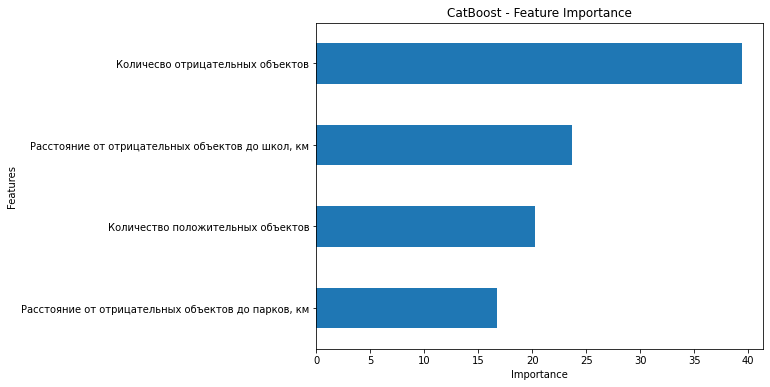

In [12]:
catr.fit(X_train, y_train, verbose=0)

fea_imp = pd.DataFrame({'imp': catr.feature_importances_, 'col': X_train.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-20:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(8, 6), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')